In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Load Data from .mat files

In [2]:

test=scipy.io.loadmat('idp_connectome_aparc_length.mat')
aparcl=np.array(test['connectome_aparc_length'])
print(aparcl.shape)

test=scipy.io.loadmat('idp_connectome_aparc_count.mat')
aparcc=np.array(test['connectome_aparc_count'])
print(aparcc.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_length.mat')
aparc2l=np.array(test['connectome_aparc2009_length'])
print(aparc2l.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_count.mat')
aparc2c=np.array(test['connectome_aparc2009_count'])
print(aparc2c.shape)

(84, 84, 211)
(84, 84, 211)
(164, 164, 211)
(164, 164, 211)


## Zeropad smaller data, reorganize shape

In [3]:
zeromatal=np.zeros([164,164,211])
zeromatac=np.zeros([164,164,211])

zeromatal[40:124,40:124,:]=aparcl
zeromatac[40:124,40:124,:]=aparcc

aparcl=zeromatal
aparcc=zeromatac

X=np.zeros([164,164,211,4])
X[:,:,:,0]=aparcl
X[:,:,:,1]=aparcc
X[:,:,:,2]=aparc2l
X[:,:,:,3]=aparc2c

X=X.transpose([2,0,1,3])
print(X.shape)

(211, 164, 164, 4)


In [4]:
datasubjid=pd.read_csv('idp_data_1_mor.csv',header=0)
datasubjid=np.array(datasubjid)
datasubjid=datasubjid[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('idp_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(matsubjid,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex,:,:,:]
print(X.shape)








(208,)
(211, 1)
(208, 164, 164, 4)


## load labels, index data for all 6 types

In [5]:
data=pd.read_csv('idp_data_1_mor.csv',header=0)
data=np.array(data)

ad_smi=data[:,5]
mci_smi=data[:,6]
ad_mci=data[:,7]

adonly_smi=data[:,8]
adonly_mci=data[:,9]
adonly_adwithsmallvv=data[:,10]

print(ad_smi.shape)

ind_num=np.isnan(ad_smi)
y_adsmi=ad_smi[~ind_num]
X_adsmi=X[~ind_num,:,:,:]

ind_num=np.isnan(mci_smi)
y_mcismi=mci_smi[~ind_num]
X_mcismi=X[~ind_num,:,:,:]

ind_num=np.isnan(ad_mci)
y_admci=ad_mci[~ind_num]
X_admci=X[~ind_num,:,:,:]


###############################################################################
# not as important
ind_num=np.isnan(adonly_smi)
y_adonlysmi=adonly_smi[~ind_num]
X_adonlysmi=X[~ind_num,:,:,:]

ind_num=np.isnan(adonly_mci)
y_adonlymci=adonly_mci[~ind_num]
X_adonlymci=X[~ind_num,:,:,:]

ind_num=np.isnan(adonly_adwithsmallvv)
y_adonlyadwithsmallvv=adonly_adwithsmallvv[~ind_num]
X_adonlyadwithsmallvv=X[~ind_num,:,:,:]


(208,)


## Run CNN with 5fold Cross validation for AD_SMI

TRAIN: [  0   1   3   4   6   7  10  11  12  13  14  15  17  18  20  21  22  24
  25  26  31  32  33  34  35  36  37  38  40  41  42  43  44  46  47  48
  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  66  70  71
  72  73  74  75  76  77  78  79  80  81  82  84  86  87  88  89  90  91
  93  94  95  96  97  98  99 100 101 103 105 106 107 108 109 110 111 112
 115 116 118 119 120 121 123 124 125 126 127 128 130 131 132 133 134 136
 138 139 140 141 142 143 144 145] TEST: [  2   5   8   9  16  19  23  27  28  29  30  39  45  51  56  67  68  69
  83  85  92 102 104 113 114 117 122 129 135 137]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

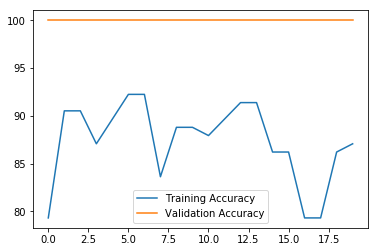

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  18  19  20
  21  22  23  25  27  28  29  30  31  33  34  36  37  38  39  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61  62
  63  66  67  68  69  70  71  72  75  76  77  78  79  80  81  83  85  86
  87  88  89  90  91  92  93  95  97  99 100 102 104 105 107 108 109 110
 113 114 116 117 120 121 122 124 126 127 128 129 130 131 132 134 135 136
 137 138 139 140 141 142 143 144 145] TEST: [ 14  15  17  24  26  32  35  40  60  64  65  73  74  82  84  94  96  98
 101 103 106 111 112 115 118 119 123 125 133]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

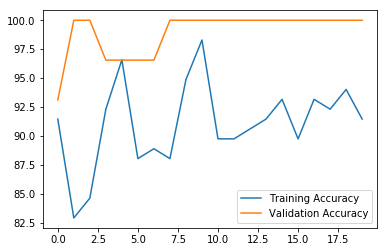

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  45  49  50  51  52  56  57  58  59  60  61  62  63  64
  65  67  68  69  71  73  74  76  78  79  82  83  84  85  86  87  88  91
  92  94  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111 112
 113 114 115 116 117 118 119 120 122 123 124 125 126 127 129 131 132 133
 134 135 136 137 138 141 143 144 145] TEST: [  0  20  21  25  44  46  47  48  53  54  55  66  70  72  75  77  80  81
  89  90  93  95 109 121 128 130 139 140 142]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
T

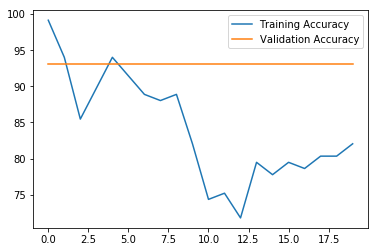

TRAIN: [  0   1   2   3   5   8   9  10  14  15  16  17  18  19  20  21  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  50  51  53  54  55  56  58  59  60  61  62  64  65
  66  67  68  69  70  71  72  73  74  75  77  80  81  82  83  84  85  88
  89  90  92  93  94  95  96  97  98 100 101 102 103 104 106 107 109 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 128 129 130
 133 135 136 137 138 139 140 142 145] TEST: [  4   6   7  11  12  13  22  43  49  52  57  63  76  78  79  86  87  91
  99 105 108 110 127 131 132 134 141 143 144]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:77 accuracy: 96.55172413793103%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epo

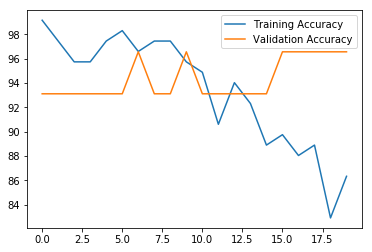

TRAIN: [  0   2   4   5   6   7   8   9  11  12  13  14  15  16  17  19  20  21
  22  23  24  25  26  27  28  29  30  32  35  39  40  43  44  45  46  47
  48  49  51  52  53  54  55  56  57  60  63  64  65  66  67  68  69  70
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  89  90
  91  92  93  94  95  96  98  99 101 102 103 104 105 106 108 109 110 111
 112 113 114 115 117 118 119 121 122 123 125 127 128 129 130 131 132 133
 134 135 137 139 140 141 142 143 144] TEST: [  1   3  10  18  31  33  34  36  37  38  41  42  50  58  59  61  62  71
  88  97 100 107 116 120 124 126 136 138 145]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

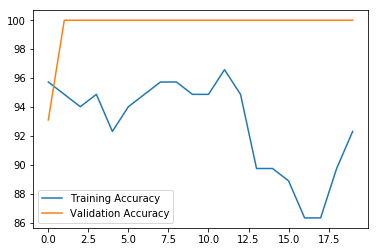

TRAIN: [  0   1   2   3   5   7   8   9  10  12  13  14  16  17  19  20  21  22
  23  24  25  26  27  28  30  31  33  34  35  36  38  39  40  41  42  44
  45  46  47  48  49  50  52  53  55  56  57  58  59  60  62  64  65  66
  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  85  87
  88  89  91  92  93  94  95  96  99 101 102 103 104 106 107 108 109 110
 111 112 114 115 117 118 119 120 121 122 124 126 127 128 129 130 131 132
 133 134 135 139 141 143 144 145] TEST: [  4   6  11  15  18  29  32  37  43  51  54  61  63  69  84  86  90  97
  98 100 105 113 116 123 125 136 137 138 140 142]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.33333333333333%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 96.66666666666667%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iterati

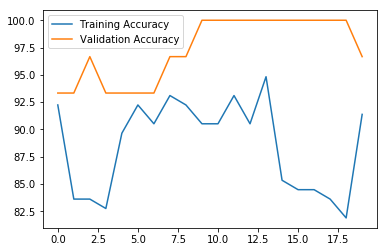

TRAIN: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  26  27  29  30  31  32  33  34  37  39  40  41  42
  43  45  46  47  50  51  54  55  58  59  60  61  62  63  67  68  69  70
  71  73  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  97  98 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 119 120 121 122 123 124 125 126 128 131 132 133 134
 136 137 138 140 141 142 143 144 145] TEST: [  9  24  25  28  35  36  38  44  48  49  52  53  56  57  64  65  66  72
  74  76  96  99 110 118 127 129 130 135 139]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best valida

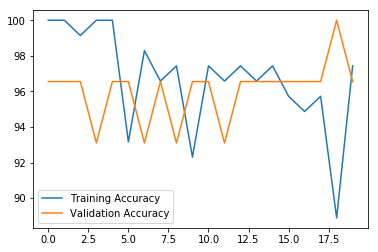

TRAIN: [  1   2   4   5   6   7   8   9  10  11  12  13  14  15  17  18  20  21
  22  24  25  27  28  29  30  32  33  34  35  36  37  38  39  40  41  43
  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  63
  64  65  66  67  68  69  70  71  72  74  76  80  81  82  84  85  86  87
  88  90  91  92  95  96  97  98  99 100 102 103 104 105 107 108 109 110
 113 114 116 117 118 119 120 121 123 124 125 127 128 129 130 131 132 133
 135 136 137 138 139 140 141 142 144] TEST: [  0   3  16  19  23  26  31  42  55  62  73  75  77  78  79  83  89  93
  94 101 106 111 112 115 122 126 134 143 145]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

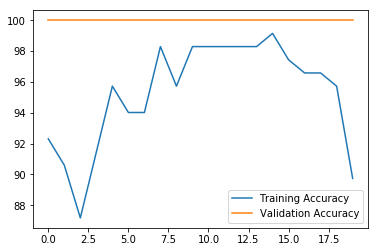

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  18  19  20
  23  24  25  26  27  28  29  31  32  35  36  37  38  39  40  42  43  44
  45  48  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65
  66  67  69  71  72  73  74  75  76  77  78  79  80  83  84  85  86  87
  88  89  90  92  93  94  96  97  98  99 100 101 102 103 105 106 108 110
 111 112 113 114 115 116 118 120 122 123 125 126 127 129 130 134 135 136
 137 138 139 140 141 142 143 144 145] TEST: [  7   8  17  21  22  30  33  34  41  46  47  60  68  70  81  82  91  95
 104 107 109 117 119 121 124 128 131 132 133]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 96.55172413793103%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iterati

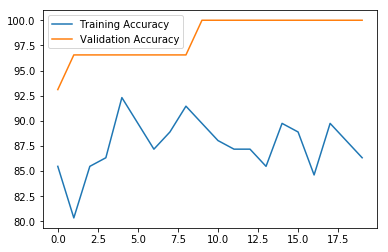

TRAIN: [  0   3   4   6   7   8   9  11  15  16  17  18  19  21  22  23  24  25
  26  28  29  30  31  32  33  34  35  36  37  38  41  42  43  44  46  47
  48  49  51  52  53  54  55  56  57  60  61  62  63  64  65  66  68  69
  70  72  73  74  75  76  77  78  79  81  82  83  84  86  89  90  91  93
  94  95  96  97  98  99 100 101 104 105 106 107 109 110 111 112 113 115
 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 145] TEST: [  1   2   5  10  12  13  14  20  27  39  40  45  50  58  59  67  71  80
  85  87  88  92 102 103 108 114 120 141 144]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

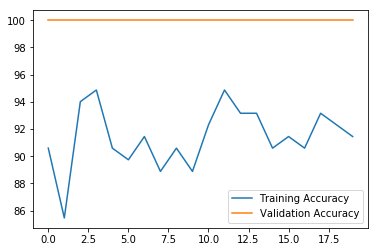

TRAIN: [  0   1   2   3   4   5   7   9  11  12  13  15  16  17  18  19  20  21
  23  24  26  28  29  31  32  33  34  36  37  38  40  42  43  45  46  47
  49  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  70  71  72  73  74  76  77  79  80  82  84  85  86  87  88  89  90
  91  92  93  94  95  97  98 100 101 102 105 106 107 108 109 110 111 112
 113 114 115 116 118 119 120 121 122 123 124 125 126 127 129 130 131 132
 134 135 136 139 140 143 144 145] TEST: [  6   8  10  14  22  25  27  30  35  39  41  44  48  50  69  75  78  81
  83  96  99 103 104 117 128 133 137 138 141 142]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.66666666666667%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

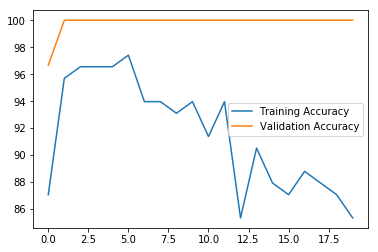

TRAIN: [  1   3   4   5   6   7   8   9  10  13  14  15  16  17  18  19  20  22
  23  24  25  27  28  29  30  31  32  34  35  37  38  39  40  41  44  45
  46  48  49  50  51  52  55  58  59  61  62  63  64  65  66  68  69  70
  71  72  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 108 109 111
 112 113 115 117 118 119 120 122 123 124 125 126 128 130 131 132 133 134
 136 137 138 139 140 141 142 143 145] TEST: [  0   2  11  12  21  26  33  36  42  43  47  53  54  56  57  60  67  73
  74 105 107 110 114 116 121 127 129 135 144]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

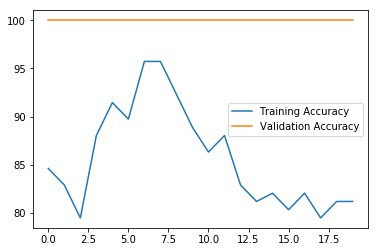

TRAIN: [  0   2   3   4   5   6   8  10  11  12  14  15  17  18  20  21  22  24
  25  26  27  28  30  32  33  34  35  36  37  39  40  41  42  43  44  45
  47  48  49  50  51  52  53  54  55  56  57  60  61  62  64  66  67  69
  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  88
  89  92  93  94  95  96  97  99 100 101 102 103 104 105 106 107 109 110
 111 114 116 117 118 119 120 121 122 124 126 127 128 129 131 132 133 134
 135 136 137 138 139 140 141 142 144] TEST: [  1   7   9  13  16  19  23  29  31  38  46  58  59  63  65  68  77  90
  91  98 108 112 113 115 123 125 130 143 145]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

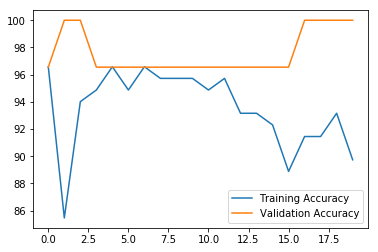

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  19  20  21
  22  23  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41
  42  43  44  46  47  48  49  50  51  53  54  56  57  58  59  60  61  63
  65  67  68  69  73  74  75  76  77  78  79  81  82  83  86  90  91  93
  94  95  96  98  99 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 121 122 123 125 126 127 128 129 130 131 132 133 135 136
 137 138 139 140 141 142 143 144 145] TEST: [  4   5  17  18  24  37  45  52  55  62  64  66  70  71  72  80  84  85
  87  88  89  92  97 100 118 119 120 124 134]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

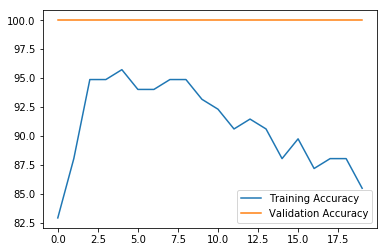

TRAIN: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  21  22  23  24  25  26  27  29  30  31  33  35  36  37  38  39  41  42
  43  44  45  46  47  48  50  52  53  54  55  56  57  58  59  60  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  77  78  80  81  83  84
  85  87  88  89  90  91  92  96  97  98  99 100 103 104 105 107 108 110
 112 113 114 115 116 117 118 119 120 121 123 124 125 127 128 129 130 133
 134 135 137 138 141 142 143 144 145] TEST: [  3  15  20  28  32  34  40  49  51  61  76  79  82  86  93  94  95 101
 102 106 109 111 122 126 131 132 136 139 140]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
T

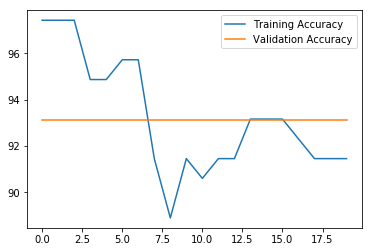

TRAIN: [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  21  22  23  25  27  28  29  30  32  33  34  35  36  37  38  39  40  41
  42  44  45  46  47  48  49  51  53  54  55  56  57  58  59  60  62  63
  64  65  66  68  69  70  71  76  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  93  94  95  97  98  99 100 101 102 103 104 105 107 109
 110 111 112 113 115 116 117 118 119 121 122 123 124 125 126 127 129 130
 134 135 136 138 139 142 144 145] TEST: [  3   9  20  24  26  31  43  50  52  61  67  72  73  74  75  77  92  96
 106 108 114 120 128 131 132 133 137 140 141 143]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

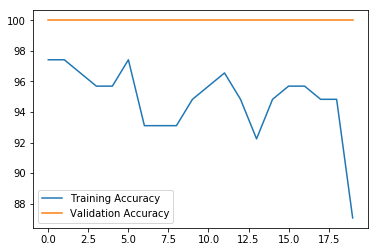

TRAIN: [  0   2   3   4   5   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  26  27  28  31  33  34  36  37  38  39  41  42  43  44
  45  48  49  50  51  52  55  57  58  59  60  61  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  85  86  88  89
  91  92  93  94  95  96  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 114 116 117 118 120 122 123 124 126 127 128 129 130 131 132 133
 134 135 136 137 139 140 141 142 143] TEST: [  1   6  11  25  29  30  32  35  40  46  47  53  54  56  62  63  84  87
  90  97  98 113 115 119 121 125 138 144 145]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

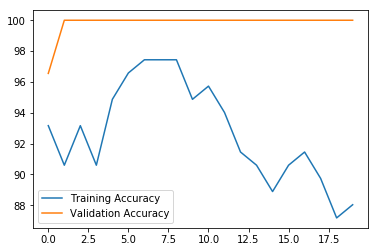

TRAIN: [  1   3   5   6   7   8   9  10  11  12  13  14  17  18  19  20  23  24
  25  26  27  29  30  31  32  33  34  35  36  37  39  40  42  43  44  46
  47  48  49  50  51  52  53  54  55  56  58  59  61  62  63  64  65  66
  67  70  71  72  73  74  75  76  77  78  79  80  82  83  84  85  86  87
  88  89  90  91  92  93  95  96  97  98  99 101 102 103 104 105 106 107
 108 113 114 115 116 118 119 120 121 122 125 126 128 129 130 131 132 133
 134 136 137 138 140 141 143 144 145] TEST: [  0   2   4  15  16  21  22  28  38  41  45  57  60  68  69  81  94 100
 109 110 111 112 117 123 124 127 135 139 142]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 96.55172413793103%
epoch 5 
Best validation accuracy! iteration:55 accuracy: 100.0%
epoch 6 
epoch 7 
epoch

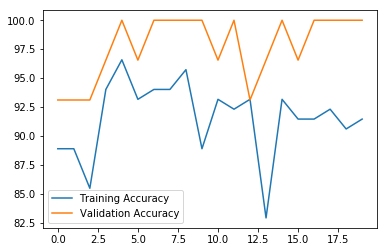

TRAIN: [  0   1   2   3   4   5   6   9  11  15  16  17  19  20  21  22  24  25
  26  28  29  30  31  32  33  34  35  36  38  39  40  41  43  44  45  46
  47  50  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  72  73  74  75  76  77  79  81  82  83  84  87  90  91  92  94
  96  97  98  99 100 101 102 104 105 106 108 109 110 111 112 113 114 115
 117 118 119 120 121 122 123 124 125 126 127 128 129 131 132 133 135 136
 137 138 139 140 141 142 143 144 145] TEST: [  7   8  10  12  13  14  18  23  27  37  42  48  49  51  70  71  78  80
  85  86  88  89  93  95 103 107 116 130 134]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:165 accuracy: 9

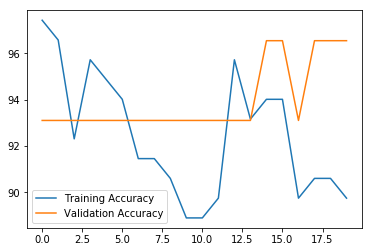

TRAIN: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  18  20
  21  22  23  24  25  26  27  28  29  30  31  32  35  37  38  40  41  42
  43  45  46  47  48  49  50  51  52  53  54  56  57  60  61  62  63  67
  68  69  70  71  72  73  74  75  77  78  80  81  84  85  86  87  88  89
  90  92  93  94  95  96  97  98 100 103 106 107 108 109 110 111 112 113
 114 115 116 117 119 120 121 123 124 125 127 128 130 131 132 133 134 135
 137 138 139 140 141 142 143 144 145] TEST: [  5  17  19  33  34  36  39  44  55  58  59  64  65  66  76  79  82  83
  91  99 101 102 104 105 118 122 126 129 136]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

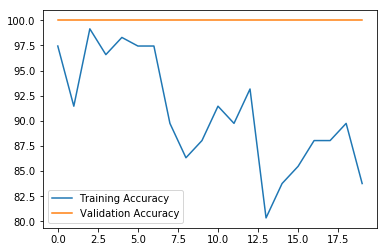

TRAIN: [  0   1   2   3   5   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  26  27  28  29  30  32  33  34  35  36  37  38  39  41  42
  43  45  47  48  49  50  51  53  54  55  56  57  58  59  60  62  64  65
  66  67  68  69  71  72  75  76  77  78  79  82  84  85  86  87  88  89
  90  91  93  94  95  97  98 100 101 102 104 105 108 110 111 112 113 114
 115 116 117 119 120 121 122 123 124 125 126 128 129 130 131 132 134 135
 136 137 138 139 140 141 142 145] TEST: [  4   6  11  24  25  31  40  44  46  52  61  63  70  73  74  80  81  83
  92  96  99 103 106 107 109 118 127 133 143 144]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.66666666666667%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch

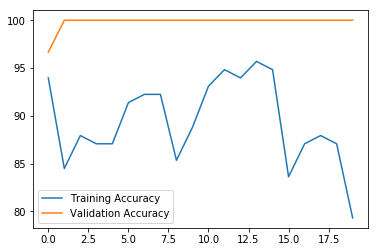

TRAIN: [  0   1   2   4   5   6   7   8  10  11  15  16  17  18  20  21  23  24
  25  26  27  28  29  31  32  33  34  36  38  39  40  41  42  43  44  45
  46  47  48  49  50  52  54  55  56  57  58  59  60  61  62  63  64  65
  66  68  70  72  73  74  76  77  78  80  81  82  83  84  85  86  88  92
  96  97  98  99 100 101 102 103 105 106 107 108 109 110 111 113 114 115
 116 117 118 119 120 121 122 123 124 125 127 128 129 130 131 132 133 134
 135 137 138 140 141 142 143 144 145] TEST: [  3   9  12  13  14  19  22  30  35  37  51  53  67  69  71  75  79  87
  89  90  91  93  94  95 104 112 126 136 139]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 96.55172413793103%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iterati

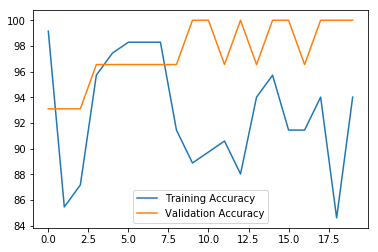

TRAIN: [  0   2   3   4   5   6   7   9  11  12  13  14  17  19  20  21  22  24
  25  26  28  30  31  32  33  34  35  36  37  39  40  41  42  44  45  46
  48  50  51  52  53  54  55  57  58  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  87  89  90
  91  92  93  94  95  96  99 100 103 104 105 106 107 108 109 111 112 113
 114 116 117 118 119 121 122 123 124 125 126 127 128 129 131 132 133 134
 135 136 137 138 139 140 142 143 144] TEST: [  1   8  10  15  16  18  23  27  29  38  43  47  49  56  59  84  85  86
  88  97  98 101 102 110 115 120 130 141 145]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
T

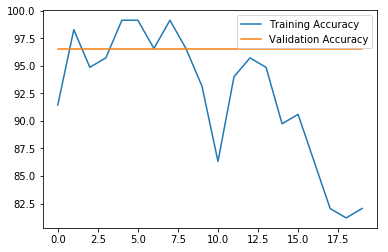

TRAIN: [  0   1   3   4   6   8   9  10  11  12  13  14  15  16  18  19  20  21
  22  23  24  25  27  28  29  30  31  32  34  35  37  38  40  41  42  43
  44  46  47  48  49  50  51  52  53  55  56  57  59  61  63  64  65  66
  67  68  69  70  71  72  73  74  75  77  79  80  81  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106
 107 108 109 110 112 114 115 116 118 120 121 123 124 126 127 129 130 131
 133 134 135 136 139 141 143 144 145] TEST: [  2   5   7  17  26  33  36  39  45  54  58  60  62  76  78  82 100 111
 113 117 119 122 125 128 132 137 138 140 142]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

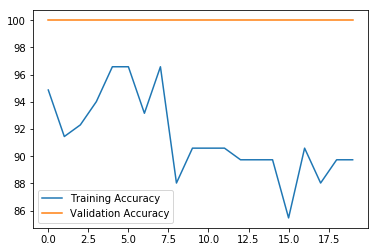

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  22  23  24  25  26  27  29  30  31  33  35  36  37  38  39  40  43
  44  45  46  47  49  51  52  53  54  56  58  59  60  61  62  63  67  69
  70  71  73  74  75  76  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 106 107 109
 110 111 112 113 115 117 118 119 120 122 125 126 127 128 130 132 133 136
 137 138 139 140 141 142 143 144 145] TEST: [  0  20  21  28  32  34  41  42  48  50  55  57  64  65  66  68  72  77
 105 108 114 116 121 123 124 129 131 134 135]
Building Network Parameters: 
fc_units=[2000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends.

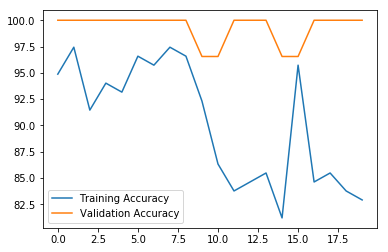

AD_SMI average accuracy is:  99.03448275862068
AD_SMI standard deviation is:  2.0735581211548855


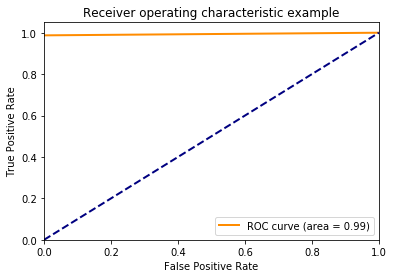

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_adsmi,y_adsmi):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train,X_test=X_adsmi[train_index],X_adsmi[test_index]
    y_train,y_test=y_adsmi[train_index],y_adsmi[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,1000,2], 
                 conv_featmap=[6,8,10],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=20,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_SMI average accuracy is: ',mean_acc)
print('AD_SMI standard deviation is: ',mean_std)
 
fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADSMI_ROC_curve.jpg')
plt.show()

## Runn CNN with 5fold CV for MCI_SMI

TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19 20 21 22 23 24 26 27
 28 29 30 32 33 37 38 39 42 43 44 45 46 47 48 49 50 52 53 54 55 56 57 58
 59 60 62 64 65 66 68 69 70 72 73 75 76 77 78 79 80 81 84 86 87 88 90 91
 92 94 95 96 97] TEST: [ 4 13 16 25 31 34 35 36 40 41 51 61 63 67 71 74 82 83 85 89 93]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 76.19047619047619%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:70 accuracy: 80.95238095238095%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

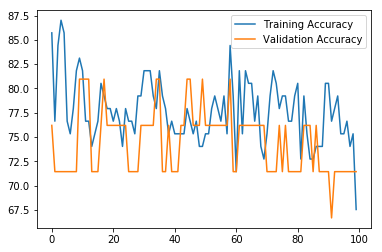

TRAIN: [ 0  2  3  4  5  7  8 10 11 13 14 15 16 17 18 20 21 23 25 26 27 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 49 50 51 52 53 54 56 58 59
 60 61 62 63 65 66 67 68 71 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 93 95 96] TEST: [ 1  6  9 12 19 22 24 28 43 48 55 57 64 69 70 72 73 92 94 97]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 90.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epo

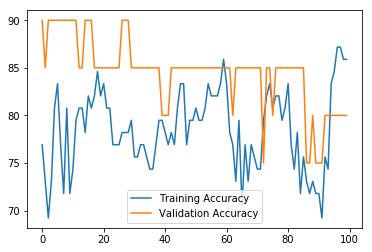

TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26
 27 28 29 31 33 34 35 36 38 40 41 42 43 44 46 47 48 49 51 52 54 55 56 57
 58 60 61 62 63 64 67 69 70 71 72 73 74 75 77 79 80 82 83 84 85 86 89 90
 91 92 93 94 95 96 97] TEST: [ 3  8 17 30 32 37 39 45 50 53 59 65 66 68 76 78 81 87 88]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


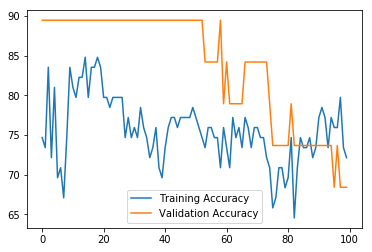

TRAIN: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 22 24 25 27 28 29
 30 31 32 33 34 35 36 37 39 40 41 43 45 46 47 48 49 50 51 52 53 55 57 59
 61 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 81 82 83 84 85 86 87
 88 89 91 92 93 94 97] TEST: [ 0  2 15 21 23 26 38 42 44 54 56 58 60 62 79 80 90 95 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 89.47368421052632%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

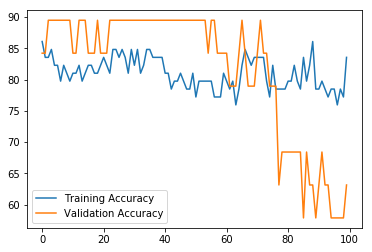

TRAIN: [ 0  1  2  3  4  6  8  9 12 13 15 16 17 19 21 22 23 24 25 26 28 30 31 32
 34 35 36 37 38 39 40 41 42 43 44 45 48 50 51 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 76 78 79 80 81 82 83 85 87 88 89
 90 92 93 94 95 96 97] TEST: [ 5  7 10 11 14 18 20 27 29 33 46 47 49 52 75 77 84 86 91]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


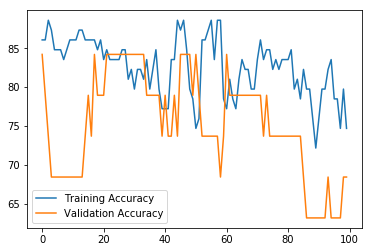

TRAIN: [ 0  1  3  4  5  7  8 10 12 13 15 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 33 34 35 36 37 39 40 41 42 44 45 46 49 50 51 52 53 54 55 56 57 58 59
 63 64 65 67 68 69 70 71 72 73 74 75 76 77 80 81 82 83 84 85 86 87 88 90
 91 92 95 96 97] TEST: [ 2  6  9 11 14 16 20 32 38 43 47 48 60 61 62 66 78 79 89 93 94]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 85.71428571428571%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


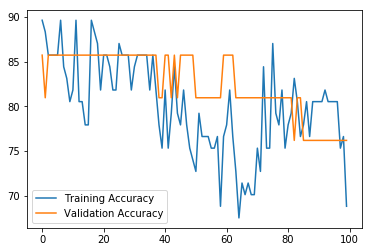

TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26
 27 29 31 32 34 35 36 37 38 39 40 42 43 44 45 46 47 48 50 51 55 56 57 58
 59 60 61 62 65 66 67 68 70 72 73 74 76 77 78 79 80 81 83 85 86 87 88 89
 90 91 92 93 94 96] TEST: [ 5 15 19 28 30 33 41 49 52 53 54 63 64 69 71 75 82 84 95 97]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 90.0%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 95.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39

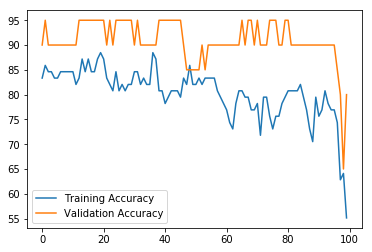

TRAIN: [ 2  3  4  5  6  7  9 10 11 14 15 16 18 19 20 21 23 24 25 26 27 28 29 30
 32 33 34 35 36 38 39 40 41 42 43 44 45 47 48 49 50 52 53 54 55 57 59 60
 61 62 63 64 66 67 68 69 71 72 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 92 93 94 95 97] TEST: [ 0  1  8 12 13 17 22 31 37 46 51 56 58 65 70 73 74 91 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


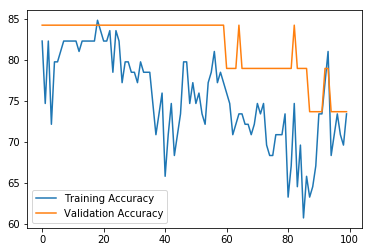

TRAIN: [ 0  1  2  5  6  8  9 11 12 13 14 15 16 17 19 20 22 23 24 25 26 28 29 30
 31 32 33 34 35 36 37 38 40 41 42 43 46 47 48 49 50 51 52 53 54 56 58 60
 61 62 63 64 65 66 67 69 70 71 72 73 74 75 77 78 79 80 82 83 84 85 86 89
 91 92 93 94 95 96 97] TEST: [ 3  4  7 10 18 21 27 39 44 45 55 57 59 68 76 81 87 88 90]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


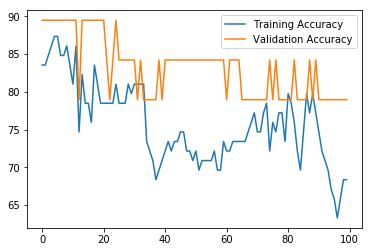

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 27
 28 30 31 32 33 37 38 39 41 43 44 45 46 47 48 49 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 68 69 70 71 73 74 75 76 78 79 81 82 84 87 88 89
 90 91 93 94 95 96 97] TEST: [23 24 25 26 29 34 35 36 40 42 50 67 72 77 80 83 85 86 92]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 68.42105263157895%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:119 accuracy: 73.6842105263158%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

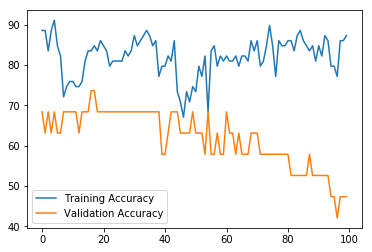

TRAIN: [ 2  4  5  7  8 10 11 12 13 14 15 16 19 20 21 23 24 25 26 29 30 31 32 34
 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 62 63 64 65 72 73 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90 91 92
 93 94 95 96 97] TEST: [ 0  1  3  6  9 17 18 22 27 28 33 39 61 66 67 68 69 70 71 74 87]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 95.23809523809524%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


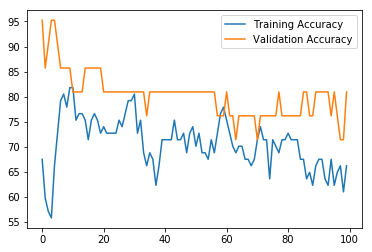

TRAIN: [ 0  1  3  4  5  6  7  9 11 13 14 15 16 17 18 19 20 21 22 24 25 26 27 28
 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 46 47 49 50 52 57 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 79 81 83 85 86 87 89 90
 91 92 93 94 95 97] TEST: [ 2  8 10 12 23 34 45 48 51 53 54 55 56 58 78 80 82 84 88 96]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 80.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:98 accuracy: 85.0%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39

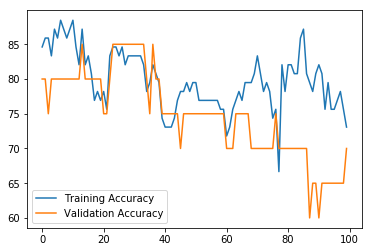

TRAIN: [ 0  1  2  3  5  6  7  8  9 10 12 15 16 17 18 19 20 21 22 23 27 28 30 31
 32 33 34 35 36 37 39 41 43 44 45 48 50 51 52 53 54 55 56 58 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 93 94 95 96] TEST: [ 4 11 13 14 24 25 26 29 38 40 42 46 47 49 57 59 75 92 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 94.73684210526315%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

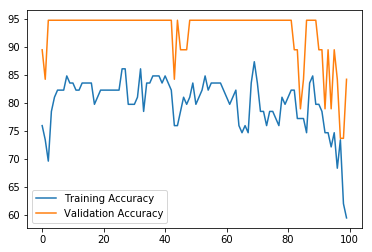

TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25 26
 27 28 29 32 33 34 38 39 40 41 42 45 46 47 48 49 50 51 53 54 55 56 57 58
 59 60 61 62 65 66 67 68 69 70 71 74 75 76 77 78 80 81 82 83 84 85 86 87
 88 90 92 93 95 96 97] TEST: [ 5 20 21 30 31 35 36 37 43 44 52 63 64 72 73 79 89 91 94]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 78.94736842105263%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 84.21052631578948%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

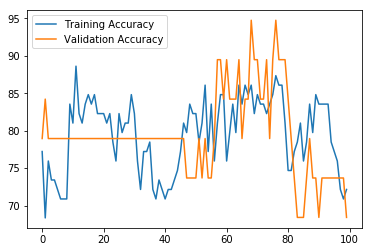

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 17 18 20 21 22 23 24 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49 51 52 53 54
 55 56 57 58 59 61 63 64 66 67 68 69 70 71 72 73 74 75 78 79 80 82 84 87
 88 89 91 92 94 96 97] TEST: [ 7 15 16 19 32 41 50 60 62 65 76 77 81 83 85 86 90 93 95]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 73.6842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:154 accuracy: 78.94736842105263%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

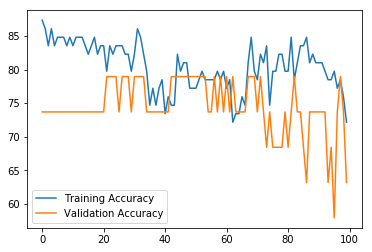

TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 17 18 19 23 24 26 27 28 31
 33 34 35 36 38 40 41 42 44 45 46 47 48 49 50 52 53 54 56 57 58 59 60 61
 63 64 65 66 67 68 69 70 71 72 73 74 76 77 78 80 81 82 83 84 85 86 88 89
 90 93 95 96 97] TEST: [ 4 16 20 21 22 25 29 30 32 37 39 43 51 55 62 75 79 87 91 92 94]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 76.19047619047619%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 80.95238095238095%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

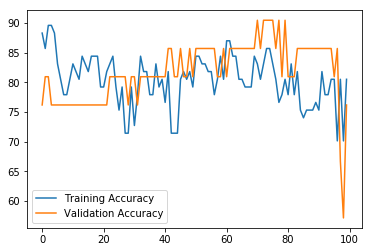

TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 15 16 17 18 20 21 22 23 24 25 27 29
 30 31 32 34 36 37 38 39 40 42 43 44 45 46 48 50 51 53 54 55 56 57 58 62
 63 64 66 67 68 69 71 72 73 74 75 76 78 79 80 81 82 83 85 86 87 89 90 91
 92 93 94 95 96 97] TEST: [ 2 13 14 19 26 28 33 35 41 47 49 52 59 60 61 65 70 77 84 88]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 95.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epo

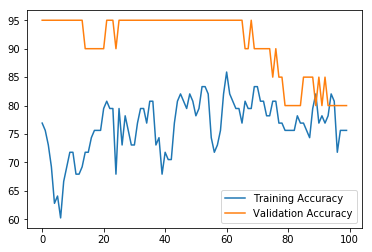

TRAIN: [ 0  2  3  4  6  7  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 41 43 44 47 48 49 51 52 54 55 56 57 59
 60 61 62 63 65 67 70 71 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 91 92 93 94 95 96] TEST: [ 1  5  8 10 15 40 42 45 46 50 53 58 64 66 68 69 72 76 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
ep

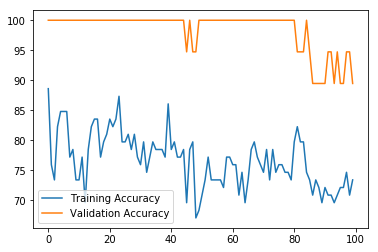

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 13 14 15 16 17 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 41 42 43 45 46 47 49 50 51 52 53 55 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 72 75 76 77 78 79 80 81 84 85 87
 88 89 91 92 94 96 97] TEST: [ 6  9 12 18 36 38 44 48 54 56 71 73 74 82 83 86 90 93 95]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 89.47368421052632%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

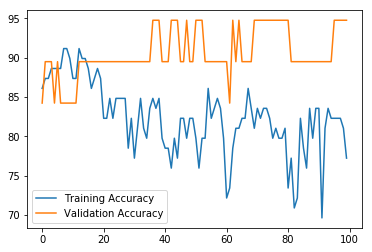

TRAIN: [ 1  2  4  5  6  8  9 10 12 13 14 15 16 18 19 20 21 22 25 26 28 29 30 32
 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 58
 59 60 61 62 64 65 66 68 69 70 71 72 73 74 75 76 77 79 82 83 84 86 87 88
 90 91 92 93 94 95 97] TEST: [ 0  3  7 11 17 23 24 27 31 34 57 63 67 78 80 81 85 89 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 73.6842105263158%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 78.94736842105263%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:182 accuracy: 84.21052631578948%
epoch 27 
epoch 28 
epoch 29 
epoc

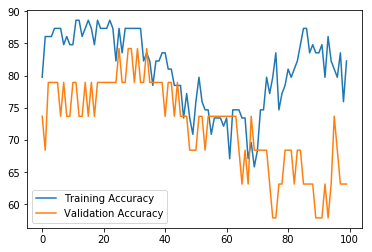

TRAIN: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23 24 25 26 27
 28 29 31 33 34 37 38 39 42 43 45 46 47 48 50 52 55 57 58 60 61 62 63 64
 65 66 67 70 71 72 73 74 75 77 78 79 80 81 82 83 84 86 87 88 89 90 91 92
 93 94 95 96 97] TEST: [ 1  2 16 18 30 32 35 36 40 41 44 49 51 53 54 56 59 68 69 76 85]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 95.23809523809524%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


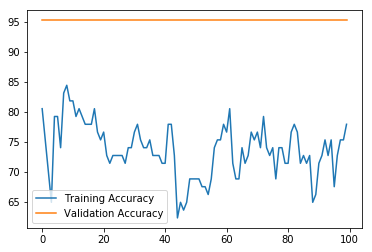

TRAIN: [ 0  1  2  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 29
 30 31 32 33 35 36 37 39 40 41 42 44 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 81 82 83 85 89 90
 91 92 93 95 96 97] TEST: [ 3  4  5  6  8 28 34 38 43 45 46 62 78 79 80 84 86 87 88 94]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 60.0%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 65.0%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:35 accuracy: 75.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:77 accuracy: 85.0%
epoch 12 
epoch 13 
Best validation accuracy! iteration:91 accuracy: 90.0%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epo

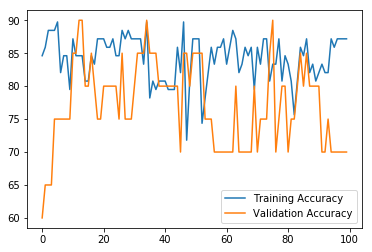

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 23 24 26 28 29
 30 31 32 33 34 35 36 37 38 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 59 60 61 62 63 64 65 67 68 69 70 71 72 73 76 78 79 80 81 82 84 85
 86 87 88 89 93 94 95] TEST: [ 0 14 21 22 25 27 39 42 58 66 74 75 77 83 90 91 92 96 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 73.6842105263158%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:28 accuracy: 78.94736842105263%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epo

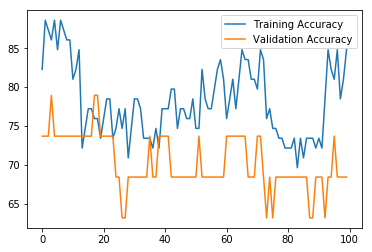

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 14 15 16 17 18 21 22 24 25 26 27 28
 30 32 34 35 36 37 38 39 40 41 42 43 44 45 46 49 50 51 53 54 56 57 58 59
 60 62 63 65 66 67 68 69 72 74 75 76 77 78 79 80 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97] TEST: [ 7 13 19 20 23 29 31 33 47 48 52 55 61 64 70 71 73 81 82]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


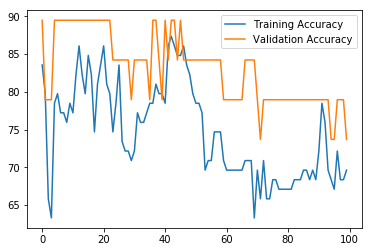

TRAIN: [ 0  1  2  3  4  5  6  7  8 13 14 16 18 19 20 21 22 23 25 27 28 29 30 31
 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54 55 56 58
 59 61 62 64 66 68 69 70 71 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 90 91 92 94 96 97] TEST: [ 9 10 11 12 15 17 24 26 37 50 57 60 63 65 67 72 89 93 95]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 94.73684210526315%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


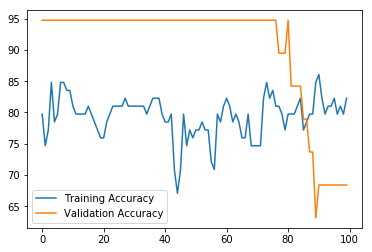

MCI_SMI average accuracy is:  88.9468671679198
MCI_SMI standard deviation is:  6.338897813681979


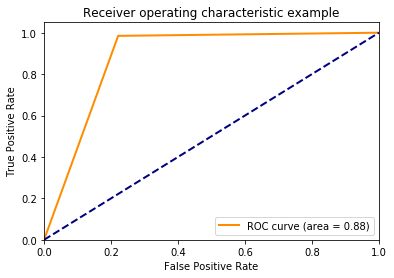

In [7]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_mcismi,y_mcismi):
    print("TRAIN:",train_index,"TEST:",test_index)
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_mcismi[train_index],X_mcismi[test_index]
    y_train,y_test=y_mcismi[train_index],y_mcismi[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('MCI_SMI average accuracy is: ',mean_acc)
print('MCI_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_MCISMI_ROC_curve.jpg')
plt.show()

## Run CNN with 5fold CV for AD_MCI

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 68.57142857142857%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 74.28571428571428%
epoch 3 
Best validation accuracy! iteration:51 accuracy: 80.0%
epoch 4 
Best validation accuracy! iteration:68 accuracy: 82.85714285714286%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:153 accuracy: 85.71428571428571%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
ep

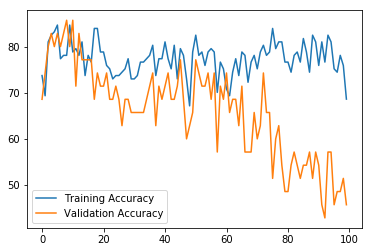

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 74.28571428571428%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 82.85714285714286%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoc

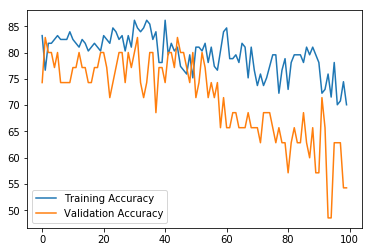

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 73.52941176470588%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 79.41176470588235%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:85 accuracy: 82.35294117647058%
epoch 6 
Best validation accuracy! iteration:102 accuracy: 85.29411764705883%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

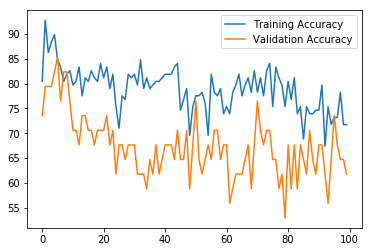

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 70.58823529411765%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 73.52941176470588%
epoch 4 
Best validation accuracy! iteration:68 accuracy: 79.41176470588235%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

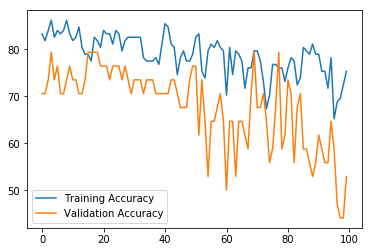

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 79.41176470588235%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 82.35294117647058%
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 85.29411764705883%
epoch 5 
Best validation accuracy! iteration:85 accuracy: 88.23529411764706%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

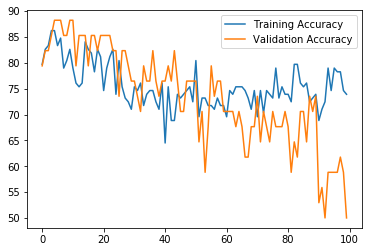

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 74.28571428571428%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 77.14285714285714%
epoch 3 
Best validation accuracy! iteration:51 accuracy: 80.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:374 accuracy: 82.85714285714286%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 


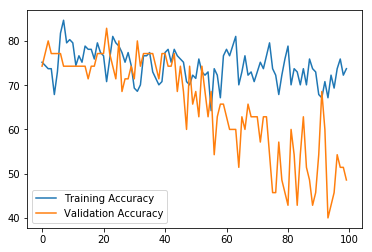

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 80.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 82.85714285714286%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 6

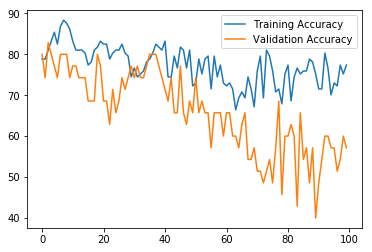

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 79.41176470588235%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:119 accuracy: 82.35294117647058%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:289 accuracy: 85.29411764705883%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

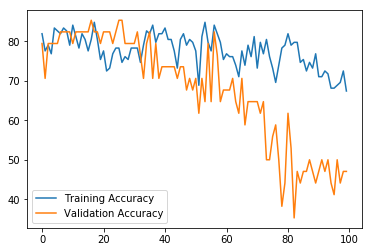

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 64.70588235294117%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 67.64705882352942%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:119 accuracy: 70.58823529411765%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:272 accuracy: 73.52941176470588%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:357 accuracy: 76.47058823529412%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

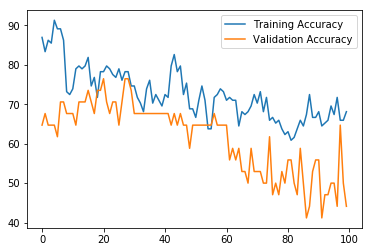

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 88.23529411764706%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 91.17647058823529%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoc

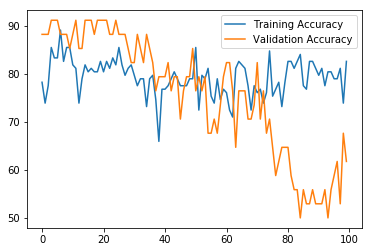

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 65.71428571428572%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 77.14285714285714%
epoch 3 
Best validation accuracy! iteration:51 accuracy: 80.0%
epoch 4 
epoch 5 
Best validation accuracy! iteration:85 accuracy: 82.85714285714286%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:238 accuracy: 85.71428571428571%
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:289 accuracy: 91.42857142857143%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epo

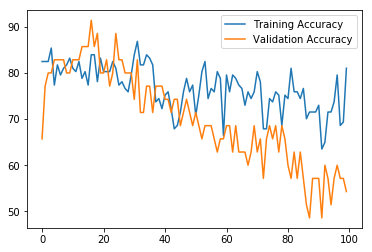

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 68.57142857142857%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 74.28571428571428%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:340 accuracy: 77.14285714285714%
epoch 21 
epoch 22 
Best validation accuracy! iteration:374 accuracy: 82.85714285714286%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 

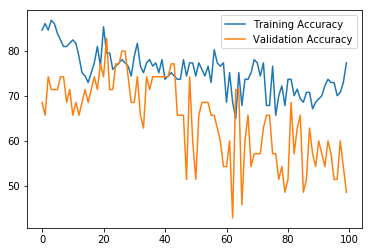

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 82.35294117647058%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 85.29411764705883%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoc

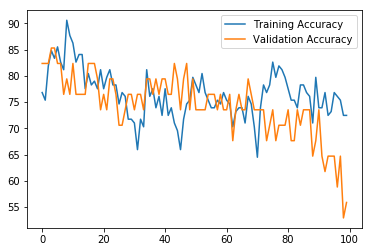

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 67.64705882352942%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 70.58823529411765%
epoch 3 
Best validation accuracy! iteration:51 accuracy: 73.52941176470588%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:153 accuracy: 76.47058823529412%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:289 accuracy: 79.41176470588235%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

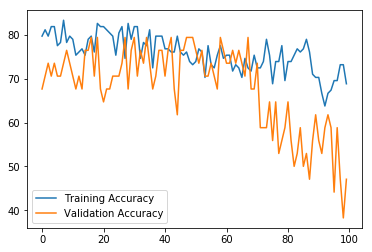

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 64.70588235294117%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 76.47058823529412%
epoch 3 
Best validation accuracy! iteration:51 accuracy: 79.41176470588235%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:204 accuracy: 82.35294117647058%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:544 accuracy: 85.29411764705883%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

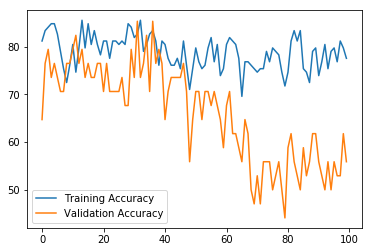

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 71.42857142857143%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 74.28571428571428%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:119 accuracy: 77.14285714285714%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:272 accuracy: 80.0%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
Best validation accuracy! iteration:816 accuracy: 82.85714285714286%


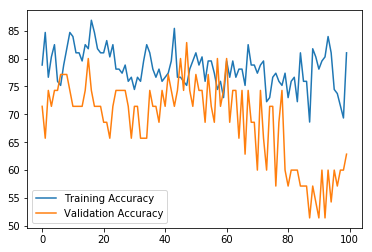

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 80.0%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 82.85714285714286%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:119 accuracy: 88.57142857142857%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62

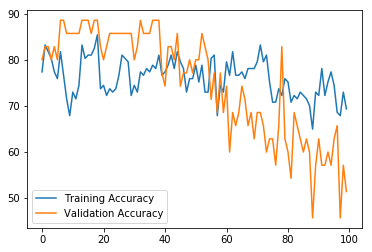

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 67.64705882352942%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 70.58823529411765%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:493 accuracy: 76.47058823529412%
epoch 30 
epoch 31 
Best validation accuracy! iteration:527 accuracy: 79.41176470588235%
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:578 accuracy: 82.35294117647058%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:680 accuracy: 85.29411764705883

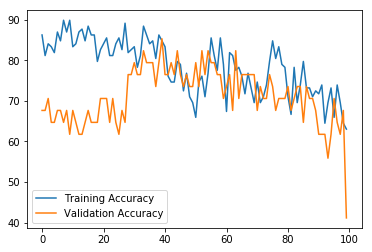

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 73.52941176470588%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 76.47058823529412%
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 79.41176470588235%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:136 accuracy: 85.29411764705883%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:221 accuracy: 88.23529411764706%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

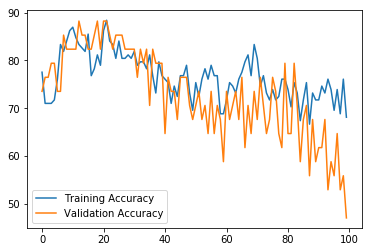

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 64.70588235294117%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 76.47058823529412%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:136 accuracy: 79.41176470588235%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:374 accuracy: 85.29411764705883%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:578 accuracy: 88.23529411764706%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

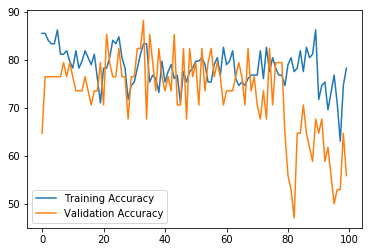

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 65.71428571428572%
epoch 2 
epoch 3 
Best validation accuracy! iteration:51 accuracy: 71.42857142857143%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:306 accuracy: 82.85714285714286%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

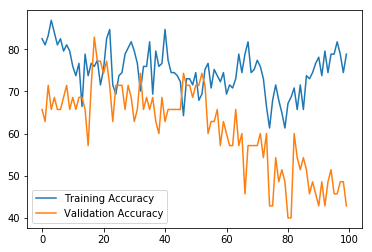

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 71.42857142857143%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 82.85714285714286%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoc

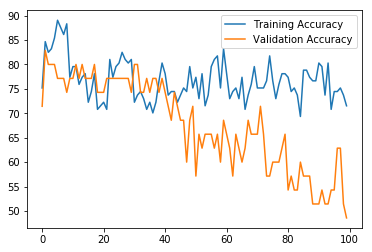

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 85.29411764705883%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 91.17647058823529%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:204 accuracy: 94.11764705882354%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

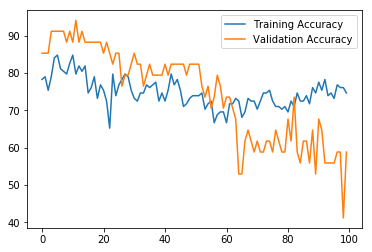

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 61.76470588235294%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 67.64705882352942%
epoch 3 
epoch 4 
Best validation accuracy! iteration:68 accuracy: 73.52941176470588%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
Best validation 

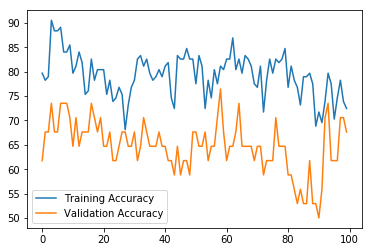

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 17
epoch 1 
Best validation accuracy! iteration:17 accuracy: 67.64705882352942%
epoch 2 
Best validation accuracy! iteration:34 accuracy: 70.58823529411765%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:340 accuracy: 76.47058823529412%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
Best validation accuracy! iteration:816 accuracy: 79.41176470588235%
epoch 49 
epoch 50 
Best validation accuracy! iteration:

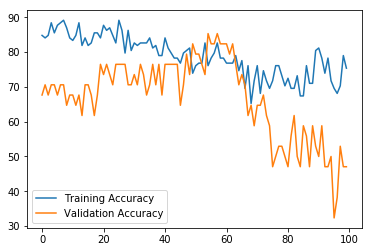

AD_MCI average accuracy is:  84.76974789915967
AD_MCI standard deviation is:  4.226433308023158


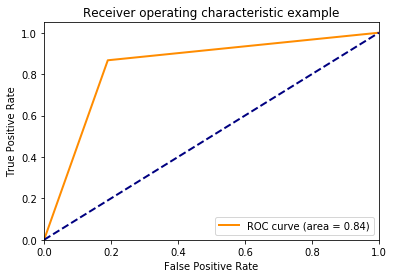

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_admci,y_admci):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_admci[train_index],X_admci[test_index]
    y_train,y_test=y_admci[train_index],y_admci[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-2,epoch=100,batch_size=8,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_MCI average accuracy is: ',mean_acc)
print('AD_MCI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADMCI_ROC_curve.jpg')
plt.show()

## Run CNN on all data, 5 fold CV for 3-label classification

Number of training points:  (165,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[3000, 1000, 3]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 16
epoch 1 
Best validation accuracy! iteration:16 accuracy: 53.48837209302326%
epoch 2 
epoch 3 
Best validation accuracy! iteration:48 accuracy: 55.81395348837209%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:576 accuracy: 58.13953488372093%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
Best validation accuracy! iteration:816 accuracy: 60.46511627906977%
epoch 52 
epoch 53 
Best 

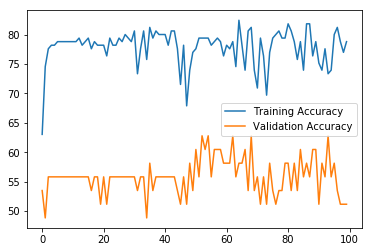

Number of training points:  (166,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[3000, 1000, 3]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 16
epoch 1 
Best validation accuracy! iteration:16 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
Best validation accuracy! iteration:48 accuracy: 59.523809523809526%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 


KeyboardInterrupt: 

In [22]:
y=data[:,1]

from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=1)
store_acc=[]
for train_index,test_index in rskf.split(X,y):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc=cnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,3], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
print('AD_MCI average accuracy is: ',mean_acc)
print(store_acc)
